# Image Classifier using FastAI 

---


This project aims to classify pets (dogs & cats) based on their breeds. The dataset used is from Oxford's Pet [Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/). 

In [0]:
# Autoreload the libraries 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# Import the libraries
from fastai import * 
from fastai.vision import * 

## GPU Utilization

Code snippet to utilize the GPU and use it to boost the performance. Instructions followed from the following [article](https://medium.com/@oribarel/getting-the-most-out-of-your-google-colab-2b0585f82403)

In [8]:
import tensorflow as tf
tf.test.gpu_device_name()


# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 10.5 GB  | Proc size: 3.4 GB
GPU RAM Free: 14302MB | Used: 777MB | Util   5% | Total 15079MB


In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Download the dataset

Download and assign the path variable


In [11]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [12]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [14]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_9.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_99.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_152.jpg')]

## Operations on the dataset

Use regex to find the data-labels and assign them. Add the labels using the `from_name_re()` function from the fastai library


In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
# transform and take images of size 224 
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0).normalize(imagenet_stats)
# data.normalize(imagenet_stats)

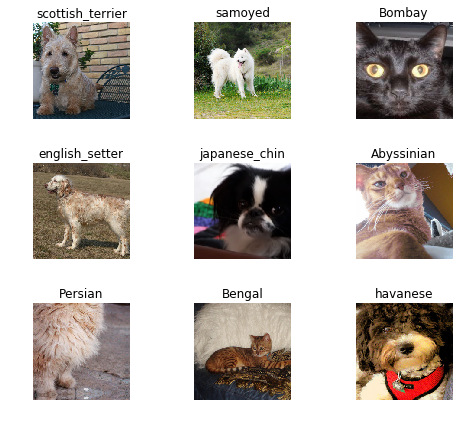

In [17]:
data.show_batch(rows=3, figsize=(7,6))

In [18]:
print(data.classes)
# data.c can be assumed as the number of classes for now
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Fitting the data

Create a Convolutional Neural Network (CNN) using `cnn_learner()` utilizing the resnet34 architecture (of size depending on what we want to train)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.408693,0.350270,0.112314,01:51
1,0.548271,0.254694,0.087280,01:50
2,0.328747,0.230992,0.080514,01:50
3,0.242945,0.222568,0.076455,01:50


In [22]:
from google.colab import drive
drive.mount('/content/drive')
print('Importing to Google Drive Complete!')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Importing to Google Drive Complete!
